In [1]:
!pip install pydotplus

# Importing Libraries

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

#Math functions
from math import log2, sqrt

#Sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import tree
from sklearn import preprocessing
from sklearn.tree import export_graphviz
from sklearn.model_selection import GridSearchCV

# Extra Libraries
from six import StringIO
from IPython.display import Image
import pydotplus
from tqdm.notebook import tqdm_notebook as tqdm

# Loading data

In [3]:
data = pd.read_csv('adult_data.csv',header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
#replacing column names
col_names = ['age','workclass','fnlwg','education','education_num','martial_status','occupation','relationship',
            'race','sex','captial_gain','capital_loss','hours_per_week','country','target']

In [5]:
data.columns = col_names

In [6]:
data.head()

,age,workclass,fnlwg,education,education_num,martial_status,occupation,relationship,race,sex,captial_gain,capital_loss,hours_per_week,country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
data.describe()

,age,fnlwg,education_num,captial_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwg           32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   martial_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  captial_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  target          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
data.isnull().sum()

age               0
workclass         0
fnlwg             0
education         0
education_num     0
martial_status    0
occupation        0
relationship      0
race              0
sex               0
captial_gain      0
capital_loss      0
hours_per_week    0
country           0
target            0
dtype: int64

# Data Exploration

<AxesSubplot:xlabel='target', ylabel='count'>

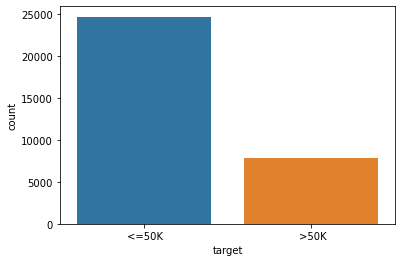

In [10]:
# Checking the data set is balanced or not
sns.countplot(x='target',data=data)

# Entropy

In [11]:
def entropy(class_Y):
    if len(class_y) <=1 :  ##handling if there is only 1 or 0 labels
        return 0 
    
    total_count = np.bincount(class_y)  #count
    probabilities = total_count[np.nonzero(totla_count)] / len(class_y) #Find the probabilities
    if len(probabilities) <= 1:  #handling if the length of the probability is less than 0 or equal 1
        return 0   
    
    return - np.sum(probabilities * np.log(probabilities)) / np.log(len(probabilities)) ##Entropy equation

    

In [12]:
x = [1,2,3,1,5]
np.bincount(x)

array([0, 2, 1, 1, 0, 1], dtype=int64)

In [13]:
x = [0,0,1,1,1,1,]
np.bincount(x)

array([2, 4], dtype=int64)

* 2-zeros and 4-ones

In [14]:
x = [0,0,1,1,1,1,]
z = np.bincount(x)
np.nonzero(z)

(array([0, 1], dtype=int64),)

# Information Gain
* It mean uncertinity

In [15]:
def information_gain(previous_y,current_y):
    conditional_entropy = 0 
    for y in current_y:
        conditional_entropy += (entropy(y)*len(y)/len(previous_y))
        
    info_gain = entropy(previous_y) - conditional_entropy
    return info_gain
    

### Test the information gain and the entropy implementation

In [16]:
#Test Case
test_class_y = [0,0,0,1,1,1,1,1]
print(entropy(test_class_y))

previous_y = [0,0,0,1,1,1]
current_y = [[0,0,],[1,1,1,0]]
print(information_gain(previous_y,current_y))

NameError: name 'class_y' is not defined